In [1]:
# -*- coding: utf-8 -*-
#@author: Renan Silva
#@Github: https://github.com/rfelipesilva
#@Python 3.8.7

In [2]:
import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Genre analysis - Congressperson candidates
Using the Base dos Dados election dataset to analysis different between genere in the Brazilian election since 1990 up to today (February 2022) for congressperson role.

It's valid to metion the scope of this analysis is only to focus on genre information, it is NOT considering race, candidature situation or intructions-graduation.

- Data access
- Exploratory data analysis
- Data formatting
- Data visualization - let's answer the following questions:
    - What is the total candidates and elected candidates by men and women?
    - What is the candidates distribution by genre through the years?
    - What is the candidates genre distrubtion by party?
- Insights:
    - What is the year with more women candidates?
    - What is the party whom indicated more women as candidates?
- References

## Data access

Here we are using two tables from brazilian elections dataset from the amazing [Base dos Dados](https://basedosdados.org/).

To know more about Base dos Dados and access the data, go ahead check it website.

In [3]:
df_candidates = bd.read_sql(query="SELECT * FROM basedosdados.br_tse_eleicoes.candidatos WHERE ano IN (1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018)",
                            billing_project_id='474173225620')
df_candidates.head()

Downloading: 100%|█████████████████████████████████████████████████████████| 138939/138939 [01:22<00:00, 1684.07rows/s]


,ano,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,numero,...,data_nascimento,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca
0,1994,eleicao ordinaria,BR,None,None,None,None,122418060191,None,13,...,1945-11-06,49.0,masculino,None,None,None,None,None,None,None
1,1994,eleicao ordinaria,BR,None,None,None,None,145641058,None,154,...,1943-05-07,51.0,feminino,None,None,None,None,None,None,None
2,1994,eleicao ordinaria,BR,None,None,None,None,16352040310,None,56,...,1938-11-05,56.0,masculino,None,None,None,None,None,None,None
3,1994,eleicao ordinaria,BR,None,None,None,None,16813380132,None,15,...,1938-08-18,56.0,masculino,None,None,None,None,None,None,None
4,1994,eleicao ordinaria,BR,None,None,None,None,17781030353,None,20,...,1932-06-09,62.0,masculino,None,None,None,None,None,None,None


In [4]:
df_result_candidates = bd.read_sql(query="SELECT * FROM basedosdados.br_tse_eleicoes.resultados_candidato WHERE ano IN (1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018)",
                            billing_project_id='474173225620')
df_result_candidates.head()

Downloading: 100%|█████████████████████████████████████████████████████████| 120515/120515 [00:24<00:00, 4917.94rows/s]


,ano,turno,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,cargo,sigla_partido,numero_candidato,sequencial_candidato,id_candidato_bd,resultado,votos
0,1994,1,eleicao ordinaria,None,None,None,presidente,PDT,12,None,None,nao eleito,1039265
1,1994,1,eleicao ordinaria,None,None,None,presidente,PMDB,15,None,None,nao eleito,1985369
2,1994,1,eleicao ordinaria,None,None,None,presidente,PPR,11,None,None,nao eleito,1307469
3,1994,1,eleicao ordinaria,None,None,None,presidente,PRN,36,None,None,nao eleito,214689
4,1994,1,eleicao ordinaria,None,None,None,presidente,PRONA,56,None,None,nao eleito,2737402


***

## Exploratory data analysis

Let's start defining the columns we are going to use for each dataframe and understand how this information are:
- df_candidate -> for this dataframe we are going to use the following columns:
    - ano
    - id_candidato_bd
    - sigla_partido
    - cargo
    - genero
    
- df_result_candidates -> for this dataframe we are going to use the following columns:
    - id_candidato_bd
    - resultado
    - votos
    - cargo
    - ano

Before look for *Null* values, let's filter some columns and work with clenaer data for the dataframe **df_candidate**:

In [5]:
df_candidates = df_candidates[['ano', 'id_candidato_bd', 'sigla_partido', 'cargo', 'genero']] #FILTERING COLUMNS
df_candidates['genero'].fillna('not informed', inplace=True) #FILLING NULL VALUES WITH "not informed"
df_candidates['cargo'].fillna('not informed', inplace=True) #FILLING NULL VALUES WITH "not informed"

The column **cargo** and **genero** for the dataframe **df_candidates** are the ones that will receive attention for now, thus we can ignore the  rest of the columns (we wil work with these later while joining the information between two tables)

In [6]:
df_candidates.cargo.value_counts() #TOTAL VALUES BY ROLE

deputado estadual      89059
deputado federal       37268
deputado distrital      4894
senador                 1711
governador              1213
vice-governador         1194
2º suplente senador     1149
1º suplente senador     1114
2º suplente              610
1º suplente              596
presidente                74
vice-presidente           57
Name: cargo, dtype: int64

In [7]:
df_candidates.genero.value_counts() #TOTAL VALUES BY GENRE

masculino       108231
feminino         30493
not informed       215
Name: genero, dtype: int64

Já temos valores para analisar, mas podemos facilitar o entendimento através de simples gráficos de distribuição:

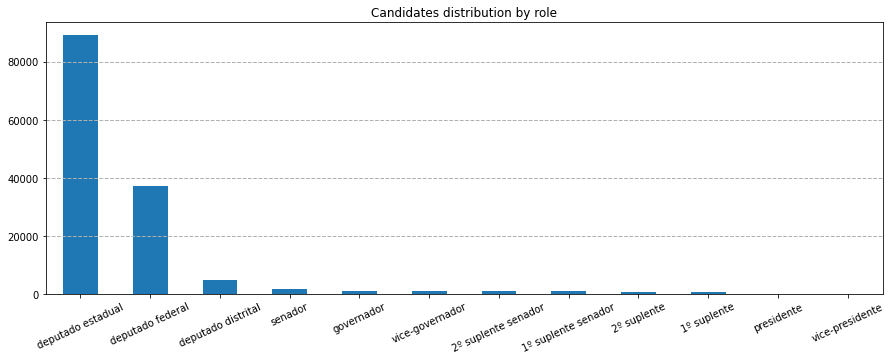

In [8]:
df_candidates.cargo.value_counts().plot(kind='bar', figsize=(15,5)).grid(axis='y', linestyle='--', linewidth=1)
plt.xticks(rotation=25)
plt.title('Candidates distribution by role')
plt.show()

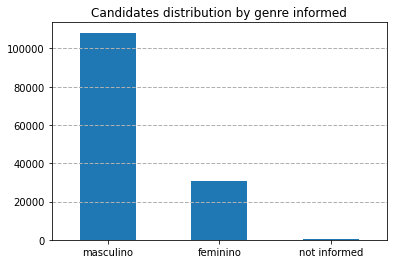

In [9]:
df_candidates.genero.value_counts().plot(kind='bar').grid(axis='y', linestyle='--', linewidth=1)
plt.xticks(rotation=0)
plt.title('Candidates distribution by genre informed')
plt.show()

About the dataframes:
- df_candidates:
    - This dataframe brings data from all the roles for the Brazilian election as *President*, *Congressperson* and etc. We will work only with **Crongressperson** role
    - This dataset has null values when we look to the variable **gênero** (but this was already handled before) 

We can see, with simple charts, now we have more clarity about the data from the dataframe **df_candidates** and mainly the variable that we are going to work with.

Let's do the same for the dataframe **df_result_candidates**:

In [10]:
df_result_candidates = df_result_candidates[['ano', 'id_candidato_bd', 'resultado', 'votos', 'cargo']] #FILTRANDO COLUNAS
df_result_candidates.head()

,ano,id_candidato_bd,resultado,votos,cargo
0,1994,None,nao eleito,1039265,presidente
1,1994,None,nao eleito,1985369,presidente
2,1994,None,nao eleito,1307469,presidente
3,1994,None,nao eleito,214689,presidente
4,1994,None,nao eleito,2737402,presidente


We can see the dataframe **df_result_candidates** there are some null values for *id_candidato_bd*, we will now verify if we have more null values:

In [11]:
df_result_candidates.isnull().sum()

ano                   0
id_candidato_bd    6492
resultado             0
votos                 0
cargo                 0
dtype: int64

For this case, we have null values for the column **id_candidato_bd**, this should be considered later while joining the dataframes.

For now this is enough, we are done with this part and we know everything we should consider for the analysis.

***

## Data formatting

To start analyzing the gender issue, we need to gather information from the two dataframes:
- df_candidate -> contains gender information of any candidate (DATA IS BEING USED ACCORDING TO DATASET FORMAT, NO DATA RECORD HAS BEEN CHANGED)
- df_result_candidates -> contains election results information (eg Votes)

At this point, we will be prioritizing the **df_result_candidates** dataframe with the post-election results and counting votes later.

To join the dataframes, we will use the ***id_candidato_bd*** column as a key value between them and we will also filter both to work only with the position of **Federal Deputy**, remembering that some of these values ​​are null as analyzed during the data exploration phase.

Let's handle the data join as follows:
1. Clear null **id_candidato_bd** from both dataframes, as these can bring more noise than help the analysis.
2. Filter only by federal deputy position, since both dataframes contain data for all positions.
3. We are also going to create a new dataframe with unique values ​​in relation to **id_candidato_bd** and **gender**, so when joining the tables we will have a cleaner dataframe to simulate the analysis.

In [12]:
#1. CLEANING DATA
df_candidates = df_candidates[df_candidates['id_candidato_bd'].isnull() == False]
df_result_candidates = df_result_candidates[df_result_candidates['id_candidato_bd'].isnull() == False]

#2. FILTERING DATA
df_congressperson = df_candidates[df_candidates['cargo'] == 'deputado federal']
df_result_congressperson = df_result_candidates[df_result_candidates['cargo'] == 'deputado federal']

#3. CREATING NEW DATAFRAME WITH UNIQUE GENRE INFO BY CANDIDATE
df_candidates_genre = df_congressperson[['id_candidato_bd','genero']].drop_duplicates()

Agora podemos seguir com a junção das tabelas e então seguir para a visualização dos dados:

In [13]:
#JOINING TABLES TO BIRNG GENRE INFO AND VOTES
df_merged = df_result_congressperson.merge(df_candidates_genre,
                                       left_on='id_candidato_bd', 
                                       right_on='id_candidato_bd',
                                       how='left')

#PREVIRW OF NEW DATAFRAME
df_merged.head()

,ano,id_candidato_bd,resultado,votos,cargo,genero
0,1998,1132763,suplente,1477,deputado federal,masculino
1,1998,1049320,eleito,7969,deputado federal,masculino
2,1998,72066,eleito por media,10011,deputado federal,feminino
3,1998,78225,eleito,10673,deputado federal,masculino
4,1998,111199,suplente,1170,deputado federal,masculino


***

# Data visualization
Now is time to answer some questions through data visualization:

### What is the total candidates and elected candidates by men and women?

In [14]:
congressperson_candidates_labels = df_merged.genero.value_counts().index
congressperson_candidates_values = df_merged.genero.value_counts().values

congressperson_elected_labels = df_merged[df_merged['resultado'] == 'eleito'].genero.value_counts().index
congressperson_elected_values = df_merged[df_merged['resultado'] == 'eleito'].genero.value_counts().values

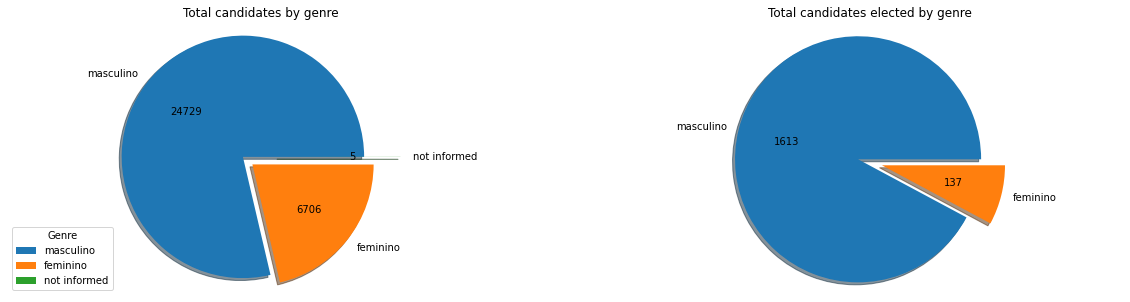

In [15]:
explode_candidates = (0, 0.1, 0.3)
explode_elected = (0, 0.2)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols= 2, figsize=(20,5))

ax1.pie(congressperson_candidates_values, explode=explode_candidates, labels=congressperson_candidates_labels, shadow=True, 
        autopct= lambda x: '{:.0f}'.format(x*congressperson_candidates_values.sum()/100))
ax1.set_title('Total candidates by genre')
ax1.axis('equal')

ax2.pie(congressperson_elected_values, explode=explode_elected, labels=congressperson_elected_labels, shadow=True,
        autopct= lambda x: '{:.0f}'.format(x*congressperson_elected_values.sum()/100))
ax2.set_title('Total candidates elected by genre')
ax2.axis('equal')

ax1.legend(title='Genre',
           loc='lower left')

plt.show()

### What is the percentage of candidates and elected candidates by men and women?

In [16]:
congressperson_candidates_perc_labels = df_merged.genero.value_counts(normalize=True).index
congressperson_candidates_perc_values = df_merged.genero.value_counts(normalize=True).values

congressperson_elected_perc_labels = df_merged[df_merged['resultado'] == 'eleito'].genero.value_counts(normalize=True).index
congressperson_elected_perc_values = df_merged[df_merged['resultado'] == 'eleito'].genero.value_counts(normalize=True).values

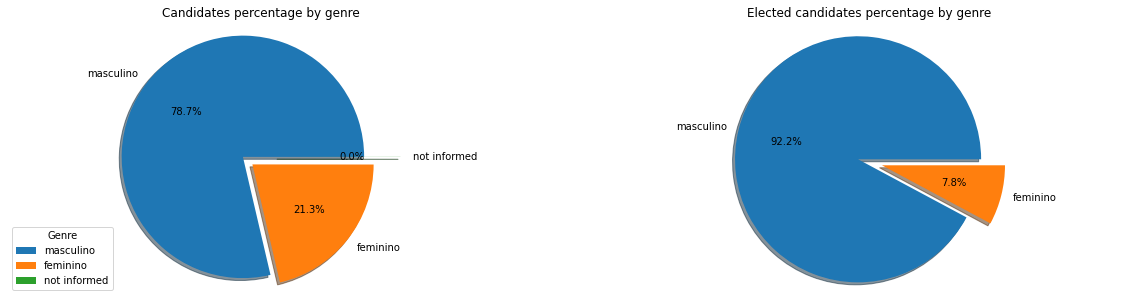

In [17]:
fig_perc, (ax1_perc, ax2_perc) = plt.subplots(nrows=1, ncols= 2, figsize=(20,5))

ax1_perc.pie(congressperson_candidates_perc_values, explode=explode_candidates, labels=congressperson_candidates_perc_labels, shadow=True, 
             autopct='%1.1f%%')
ax1_perc.set_title('Candidates percentage by genre')
ax1_perc.axis('equal')

ax2_perc.pie(congressperson_elected_perc_values, explode=explode_elected, labels=congressperson_elected_perc_labels, shadow=True,
             autopct='%1.1f%%')
ax2_perc.set_title('Elected candidates percentage by genre')
ax2_perc.axis('equal')

ax1_perc.legend(title='Genre',
           loc='lower left')

plt.show()

### What is the candidates distribution by genre through the years?

In [18]:
#FORMATTING DATA TO PLOT THE CHART
df_candidates_by_year = df_merged.groupby(['ano','genero']).size().reset_index(name='counts').pivot('ano','genero','counts').reset_index()[['ano','feminino','masculino',]]
#COLOCANDO VALOR 0 QUANDO FOR Null
df_candidates_by_year.fillna(0, inplace=True)

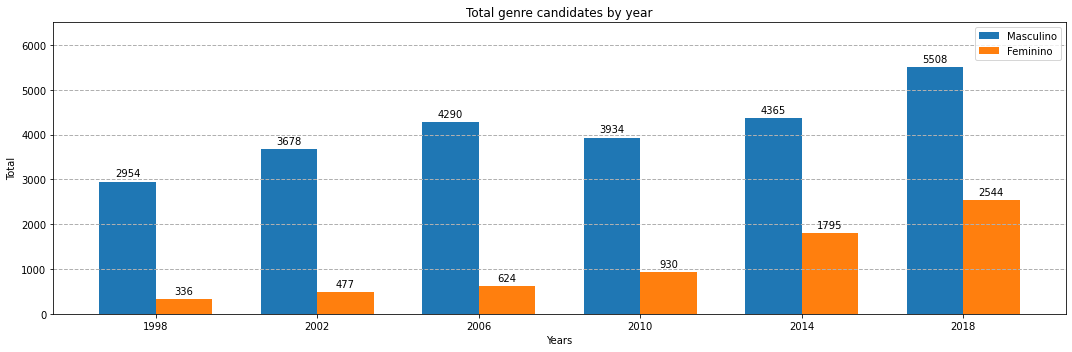

In [33]:
#DEFINING VALUES IN THE CHART
labels = list(df_candidates_by_year['ano'].values)
men = list(df_candidates_by_year['masculino'].values)
women = list(df_candidates_by_year['feminino'].values)

x = np.arange(len(labels))  # LOCALIZAÇÃO DAS BARRAS
width = 0.35  # TAMANHO DAS BARRAS

fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x - width/2, men, width, label='Masculino')
rects2 = ax.bar(x + width/2, women, width, label='Feminino')

# FORMATTING CHART LEGENDS
ax.set_ylabel('Total')
ax.set_title('Total genre candidates by year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Years')
ax.legend()

plt.grid(axis='y', linestyle='--', linewidth=1)

def autolabel(rects):
    """Annot the value in the bars"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 ALINHAMENTO VERTICAL
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.ylim(0, max(men)+1000)
plt.show()

### What is the candidates genre distrubtion by party?

In [20]:
df_candidates_by_party = df_candidates.groupby(['sigla_partido','genero']).size().reset_index(name='counts').pivot('sigla_partido','genero','counts').reset_index()[['sigla_partido','feminino','masculino',]]
#REPLACING NULL VALUES BY 0
df_candidates_by_party.fillna(0, inplace=True)

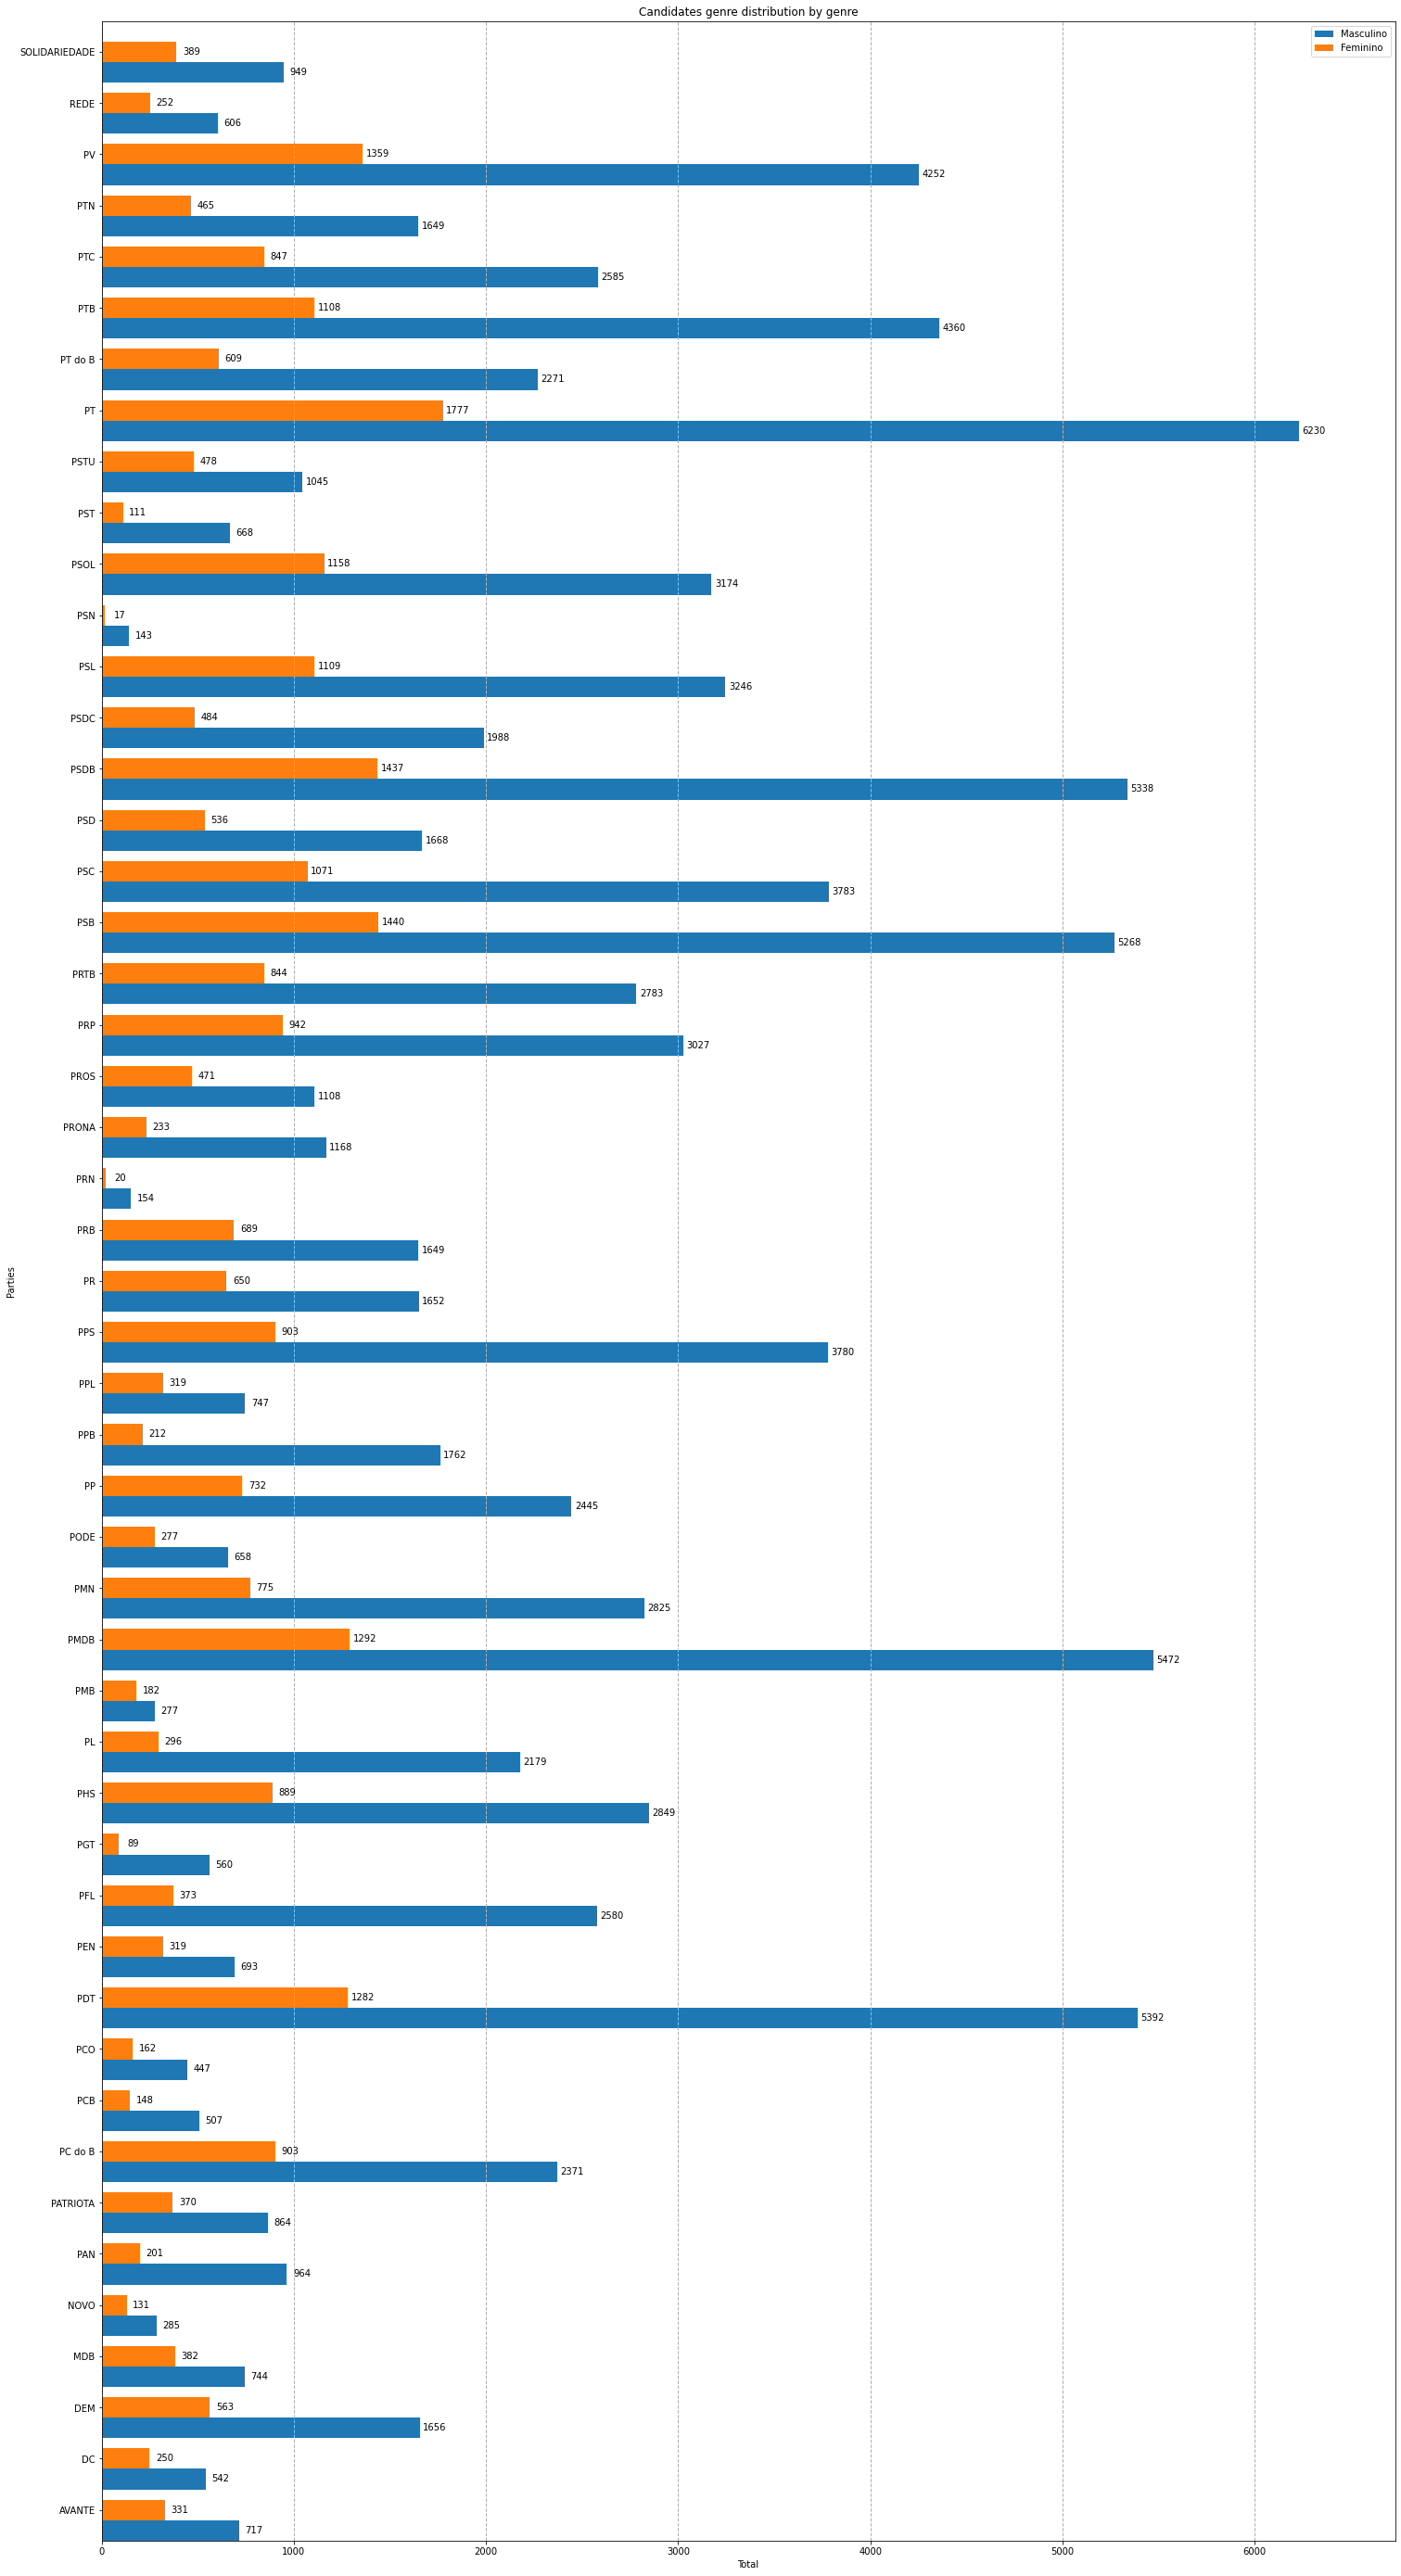

In [31]:
#DEFINING VALUES
labels = list(df_candidates_by_party['sigla_partido'].values)
men = list(df_candidates_by_party['masculino'].values)
women = list(df_candidates_by_party['feminino'].values)

ind = np.arange(len(df_candidates_by_party))
width = 0.4

fig, ax = plt.subplots(figsize=(25,50))
rects1 = ax.barh(ind, df_candidates_by_party['masculino'], width, color='tab:blue', label='Masculino')
rects2 = ax.barh(ind + width, df_candidates_by_party['feminino'], width, color='tab:orange', label='Feminino')

ax.set(yticks=ind + width, yticklabels=df_candidates_by_party['sigla_partido'], ylim=[2*width - 1, len(df_candidates_by_party)])
ax.set_ylabel('Parties')
ax.set_xlabel('Total')
ax.legend()

def autolabel(rects):
    """Coloca o valor correspondente em cima de cada barra"""
    for rect in rects.patches:
        y_value = rect.get_width()
        x_value = rect.get_y() + rect.get_height() / 4
        space = 1
        
        label = int(y_value)
        
        plt.annotate(label,
                    (y_value, x_value),
                    xytext=(16, space),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    size=10)

autolabel(rects1)
autolabel(rects2)

plt.grid(axis='x', linestyle='--', linewidth=1)

plt.xlim(0, max(men)+500)

plt.title('Candidates genre distribution by genre')

plt.show()

With that we are done with data visualization, in the next section we are going to identify some insights.

***

# Insights
Once we visualized the data, it get easier to understand, right? For instance, these are two questions that the visualization quickly support:
1. What is the year with more women candidates?
 - According with the visualization, the year with more women candidates was: 2018
 
2. What is the party whom indicated more women as candidates?
 - According with visualization, the party with more women indicated was the PT with: 1777
 
That's all folks. I appreciate your reading this far and feel free to ping me to suggest or comment anything.

***

# References


- **Base dos Dados** -> https://basedosdados.org/
- **Pandas** -> https://pandas.pydata.org/
- **Matplotlib** -> https://matplotlib.org/